In [1]:
import scipy.io as sio
mat = sio.loadmat("./imdb/imdb.mat")

Jamie Lee Curtis
30/nm0000130_rm1504221952_1958-11-22_2005.jpg


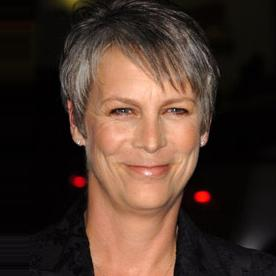

In [2]:
from IPython.core.display import Image 
idx = 11114
path ='./imdb_crop/' + mat['imdb'].item()[2][0][idx][0]
print(mat['imdb'].item()[4][0][idx][0])
print(mat['imdb'].item()[2][0][idx][0])
Image(filename=path)

In [3]:
import numpy
embeddings = numpy.load('./embeddings.npy')
image_list = numpy.load('./image_list.npy')

In [4]:
file2name = {}
for idx in range(0, len(mat['imdb'].item()[2][0])):
    file2name[mat['imdb'].item()[2][0][idx][0]] = mat['imdb'].item()[4][0][idx][0]

In [5]:
cleaned_imagelist = list(map(lambda x: x.split('/')[-2]+'/' + x.split('/')[-1], image_list))

Peter Riegert


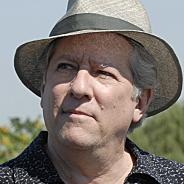

In [6]:
idx = 803
print(file2name[cleaned_imagelist[idx]])
path ='./imdb_crop/' + cleaned_imagelist[idx]
Image(filename=path)

In [7]:
name2file = {}
for file_name, name in file2name.items():
    if name in name2file:
        name2file[name].append(file_name)
    else:
        name2file[name] = [file_name]

In [111]:
filtered_name2file = {k: v for k, v in name2file.items() if len(v) >= 100}
len(list(filtered_name2file.items()))

1125

In [138]:
example = list(filtered_name2file.keys())[1]
print(example)
vecs = [embeddings[cleaned_imagelist.index(x)] for x in name2file[example]]
print(len(vecs))
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
dists = squareform(pdist(vecs,'cosine'))

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics.pairwise import cosine_distances as cosine

labels = DBSCAN(eps=0.1, min_samples=20, metric='precomputed').fit_predict(dists)
from collections import Counter
counts = Counter(labels)
counts.pop(-1, None)
print(counts)
biggest_cluster = counts.most_common(1)
print(np.where(labels == biggest_cluster[0][0]))

Raquel Welch
113
Counter({0: 22})
(array([ 24,  27,  29,  36,  47,  54,  63,  71,  74,  77,  81,  87,  92,
        94,  97, 100, 102, 105, 106, 107, 108, 109]),)


In [136]:
print(np.where(labels == -1))

(array([ 8,  9, 10, 11, 12, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
       31, 35, 36, 37, 39, 40, 44, 46, 48, 49, 51, 54, 55, 56, 57, 58, 59,
       60, 61, 62, 63, 65, 66, 68, 69, 70, 72, 74, 77, 78, 79, 80, 85, 92]),)


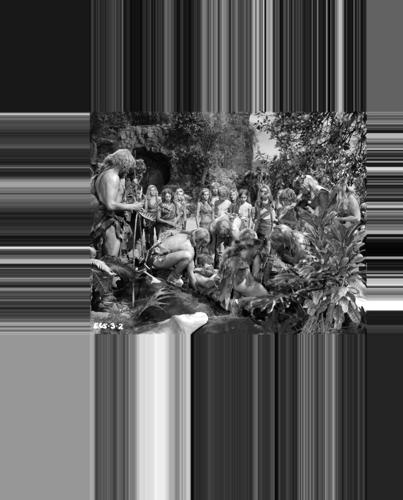

In [141]:
path ='./imdb_crop/' + filtered_name2file[example][74]
from IPython.core.display import Image as DImage
DImage(filename=path)

In [ ]:
from annoy import AnnoyIndex
import random

f = 40
t = AnnoyIndex(f)  # Length of item vector that will be indexed
for i in xrange(1000):
    v = [random.gauss(0, 1) for z in xrange(f)]
    t.add_item(i, v)

t.build(10) # 10 trees
t.save('test.ann')


u = AnnoyIndex(f)
u.load('test.ann') # super fast, will just mmap the file
print(u.get_nns_by_item(0, 1000)) 

In [ ]:
from PIL import Image
def is_grey_scale(img_path="lena.jpg"):
    im = Image.open(img_path).convert('RGB')
    w,h = im.size
    print(w,h)
    for i in range(w):
        for j in range(h):
            r,g,b = im.getpixel((i,j))
            if r != g != b: return False
    return True
print(is_grey_scale(path))